In [7]:
import numpy as np
import glob


# Ottieni la lista dei file
file_list_4 = glob.glob('SN_IIP_D01/SNIIP_22_D01_block_*.dat')

# Definisci i range dei blocchi
block_ranges = [(1, 51)]
fluence_tot = []

# Funzione per calcolare la fluence
def calculate_fluence(data, time):
    flux = data[:, 7]/1e9  # Supponiamo che la prima colonna sia il flusso
    # Calcola la fluence per il blocco corrente
    block_fluence = np.trapz(flux, dx=time)
    return block_fluence

# Itera sui range dei blocchi
for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    
    total_fluence = 0

    # Itera su tutti i file
    for file_name in file_list_4:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIP_22_D01_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
            # Calcola S_IIp basato sul numero di blocco
            S_IIp_time = 1e3 * pow(10., 0.1 * (block_number - 1))
            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            # Calcola la fluence per il blocco corrente
            block_fluence = calculate_fluence(new_data, S_IIp_time)
            total_fluence += block_fluence

    fluence_tot.append(total_fluence)

# Stampa la fluence totale per ogni range di blocchi
for idx, fluence in enumerate(fluence_tot):
    print(f"Fluence totale per il range {block_ranges[idx]}: {fluence} neutrini/cm^2")


Fluence totale per il range (1, 51): 6.075958656216893e+35 neutrini/cm^2


In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt

[5.38395226e+37 5.46880378e+37 5.46985877e+37 5.37217151e+37
 5.17305427e+37 4.90757300e+37 4.60147452e+37 4.22459108e+37
 3.78536261e+37 3.29104848e+37 2.75898070e+37 2.21930692e+37
 1.75667019e+37 1.36584076e+37 1.04507035e+37 7.79167076e+36
 5.83960846e+36 4.32732723e+36 3.17128174e+36 2.28285263e+36
 1.67015078e+36 1.21628555e+36 8.82076551e+35 6.32952679e+35
 4.63563617e+35 3.38941396e+35 2.47228403e+35 1.77780772e+35
 1.30802969e+35 9.59811901e+34 7.02172733e+34 5.05278515e+34
 3.72573043e+34 2.73958894e+34 2.00803718e+34 1.44771067e+34
 1.06825506e+34 7.85446792e+33 5.75159196e+33 4.14609462e+33
 3.05606151e+33 2.24643530e+33 1.64669227e+33 1.19077232e+33
 8.80637240e+32 6.49649188e+32 4.77780894e+32 3.45537609e+32
 2.55710039e+32 1.88608007e+32 1.38631766e+32 1.00045171e+32
 7.40426252e+31 5.46624166e+31 4.02411742e+31 2.90818675e+31
 2.15747433e+31 1.59675094e+31 1.17832341e+31 8.52775396e+30
 6.33399794e+30 4.69119910e+30 3.46276104e+30 2.50468736e+30
 1.85945910e+30 1.376250

C:\Users\Asus\AppData\Local\Temp\ipykernel_14220\1492980708.py:60: RuntimeWarning: divide by zero encountered in log10
  plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')


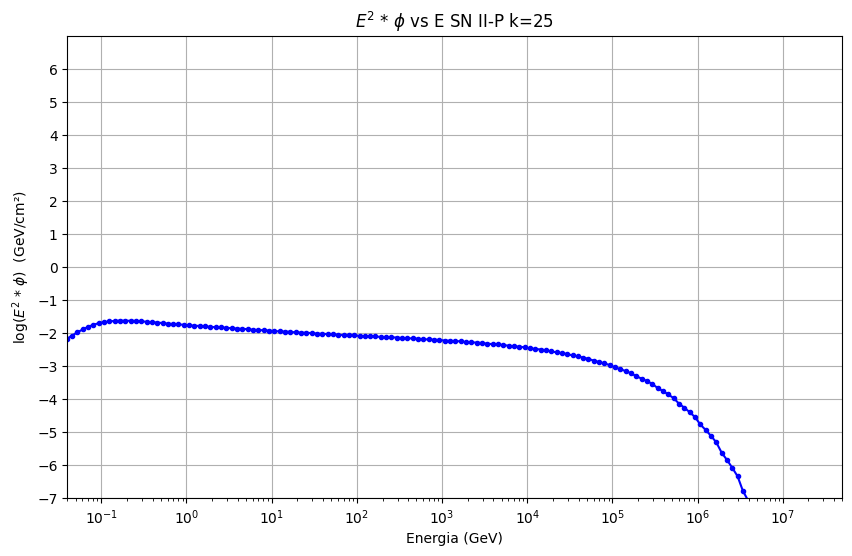

In [9]:
############### CODICE PER SN II-P ##############

# Ottieni la lista dei file
file_list_4 = glob.glob('SN_IIP_NOCCSM/SNIIP_22_noccsm_block_*.dat')

# Definisci i range dei blocchi
block_ranges = [(1, 51)]

# Funzione per calcolare la fluence energetica
def calculate_energy_fluence(data, time):
    e= data[:, 0]
    energy= e[e>2e7]
    flux = data[:, 7][e>2e7]
                     
    # Calcola la fluence energetica (fluence per unità di energia)
    energy_fluence = flux * time
    return energy, energy_fluence

# Liste per accumulare i dati per il plot
all_energies = []
all_energy_fluences = []
energy = []

# Itera sui range dei blocchi
for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    
    # Itera su tutti i file
    for file_name in file_list_4:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIP_22_noccsm_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
            # Calcola S_IIp basato sul numero di blocco
            S_IIp_time = 1e3 * pow(10., 0.1 * (block_number - 1))
            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            if new_data[-1,-1] == 1 and block_number == 25:
                
            # Calcola la fluence energetica per il blocco corrente
                E = new_data[:,0]/1e9
                energies, energy_fluences = calculate_energy_fluence(new_data, S_IIp_time)
                print(energy_fluences)
                all_energies.append(energies)
                energy.append(E)
                all_energy_fluences.append(energy_fluences)

# Converte le liste in array numpy per facilitare la manipolazione
all_energies = np.concatenate(all_energies)
all_energy_fluences = np.concatenate(all_energy_fluences)
#all_energies = np.asarray(all_energies)
#all_energy_fluences = np.asarray(all_energy_fluences)
energy = np.concatenate(energy)

# Calcola E^2 * fluence
E2_fluence = all_energies**2 * all_energy_fluences

# Plot E^2 * fluence vs E
d = 3.0857*1e22
plt.figure(figsize=(10, 6))
plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')
plt.xlabel('Energia (GeV)')
plt.ylabel('log($E^2$ * $\phi$)  (GeV/cm²)')
plt.title(f'$E^2 $ * $\phi$ vs E SN II-P k=25')
plt.xscale('log')
yvalue=np.arange(-7,7,1)
plt.yticks(yvalue)
plt.ylim(-7,7)
plt.xlim(4*1e-2,5e7)
plt.grid(True)
plt.show()



[9.92417598e+34 7.26021003e+34 5.29093324e+34 3.83862561e+34
 2.71694991e+34 1.98035741e+34 1.43738485e+34 1.03822319e+34
 7.30660065e+33 5.29861758e+33 3.82436373e+33 2.74536297e+33
 1.91679563e+33 1.38025514e+33 9.88556457e+32 7.03647889e+32
 4.85899774e+32 3.46522386e+32 2.45578056e+32 1.72785270e+32
 1.17523203e+32 8.27175941e+31 5.77871457e+31 4.00255808e+31
 2.66643569e+31 1.84375967e+31 1.26344060e+31 8.56834943e+30
 5.54821615e+30 3.74612898e+30 2.50149128e+30 1.64917840e+30
 1.02708565e+30 6.71734183e+29 4.33307934e+29 2.75080525e+29
 1.62363036e+29 1.01756087e+29 6.26760270e+28 3.78344386e+28
 2.07232909e+28 1.22676767e+28 7.10465760e+27 4.01040053e+27
 1.97703386e+27 1.08427544e+27 5.78424856e+26 2.98660997e+26
 1.26604948e+26 6.26614805e+25 2.99576793e+25 1.37431638e+25
 4.66774319e+24 2.00886534e+24 8.28516747e+23 3.24870271e+23
 7.85155596e+22 2.77146758e+22 9.29924667e+21 2.96366765e+21
 4.13821979e+20 1.07895016e+20 2.62390305e+19 6.17848972e+18
 3.79014789e+17 6.055097

C:\Users\Asus\AppData\Local\Temp\ipykernel_25580\2335530323.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')


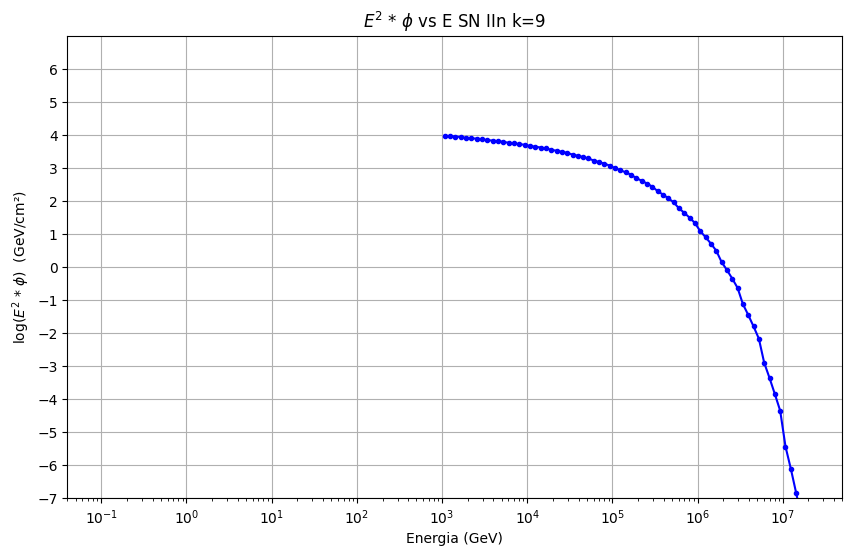

In [8]:
#############CODICE PER SN IIn#############

# Ottieni la lista dei file
file_list_4 = glob.glob('SN_IIn/SNIIn_22_block_*.dat')

# Definisci i range dei blocchi
block_ranges = [(1, 51)]

# Funzione per calcolare la fluence energetica
def calculate_energy_fluence(data, time):
    e= data[:, 0]
    energy= e[e>1e12]
    flux = data[:, 7][e>1e12]
                     
    # Calcola la fluence energetica (fluence per unità di energia)
    energy_fluence = flux * time
    return energy, energy_fluence

# Liste per accumulare i dati per il plot
all_energies = []
all_energy_fluences = []
energy = []

# Itera sui range dei blocchi
for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    
    # Itera su tutti i file
    for file_name in file_list_4:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SNIIn_22_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
            # Calcola S_IIn basato sul numero di blocco
            S_IIp_time = 1e5 * pow(10., 0.1 * (block_number - 1))
            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            if new_data[-1,-1] == 1 and block_number==26:
            # Calcola la fluence energetica per il blocco corrente
                E = new_data[:,0]
                energies, energy_fluences = calculate_energy_fluence(new_data, S_IIp_time)
                print(energy_fluences)
                all_energies.append(energies)
                energy.append(E)
                all_energy_fluences.append(energy_fluences)

# Converte le liste in array numpy per facilitare la manipolazione
all_energies = np.concatenate(all_energies)
all_energy_fluences = np.concatenate(all_energy_fluences)
#all_energies = np.asarray(all_energies)
#all_energy_fluences = np.asarray(all_energy_fluences)
energy = np.concatenate(energy)

# Calcola E^2 * fluence
E2_fluence = all_energies**2 * all_energy_fluences

# Plot E^2 * fluence vs E
d = 3.0857*1e22
plt.figure(figsize=(10, 6))
plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')
plt.xlabel('Energia (GeV)')
plt.ylabel('log($E^2$ * $\phi$)  (GeV/cm²)')
plt.title(f'$E^2 $ * $\phi$ vs E SN IIn k={block_number}')
plt.xscale('log')
yvalue=np.arange(-7,7,1)
plt.yticks(yvalue)
plt.ylim(-7,7)
plt.xlim(4*1e-2,5e7)
plt.grid(True)
plt.show()



[3.72771702e+41 3.78645915e+41 3.78719527e+41 3.71955664e+41
 3.58170298e+41 3.39789459e+41 3.18595602e+41 2.92501309e+41
 2.62089165e+41 2.27864987e+41 1.91025491e+41 1.53659145e+41
 1.21627544e+41 9.45676765e+40 7.23582934e+40 5.39477994e+40
 4.04320621e+40 2.99614301e+40 2.19573156e+40 1.58060073e+40
 1.15637656e+40 8.42133510e+39 6.10734110e+39 4.38245094e+39
 3.20964846e+39 2.34678275e+39 1.71177676e+39 1.23093468e+39
 9.05669863e+38 6.64568442e+38 4.86183130e+38 3.49855332e+38
 2.57971117e+38 1.89691016e+38 1.39038812e+38 1.00241666e+38
 7.39681811e+37 5.43861044e+37 3.98257121e+37 2.87088747e+37
 2.11612577e+37 1.55552017e+37 1.14024508e+37 8.24544522e+36
 6.09793984e+36 4.49845245e+36 3.30834071e+36 2.39261128e+36
 1.77058198e+36 1.30593448e+36 9.59863841e+35 6.92664973e+35
 5.12607624e+35 3.78408255e+35 2.78550842e+35 2.01280651e+35
 1.49302385e+35 1.10481683e+35 8.15136948e+34 5.89774759e+34
 4.37936977e+34 3.24247928e+34 2.39249561e+34 1.72967492e+34
 1.28346188e+34 9.493931

C:\Users\Asus\AppData\Local\Temp\ipykernel_26088\806365454.py:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')


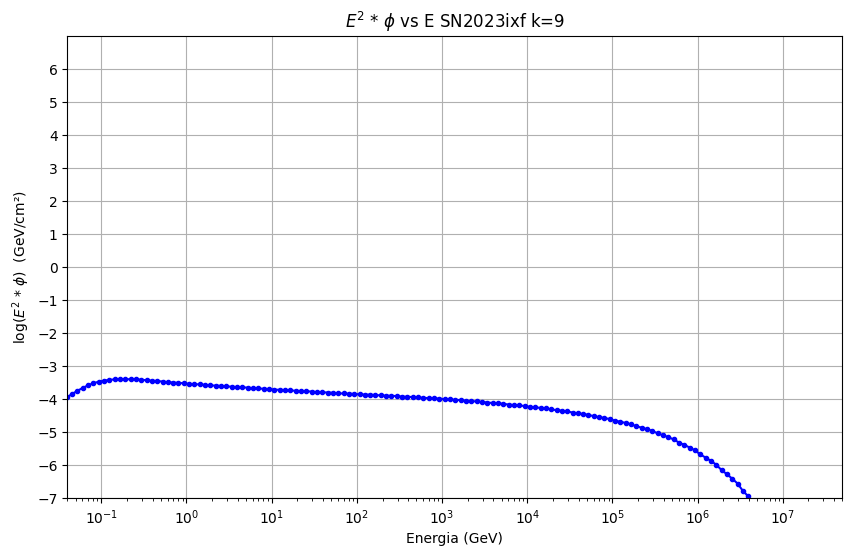

In [16]:
#############CODICE PER SN2023 ixf #############

# Ottieni la lista dei file
file_list_4 = glob.glob('SN2023ixf/SN2023ixf_block_*.dat')

# Definisci i range dei blocchi
block_ranges = [(1, 51)]

# Funzione per calcolare la fluence energetica
def calculate_energy_fluence(data, time):
    e= data[:, 0]
    energy= e[e>2e7]
    flux = data[:, 7][e>2e7]/6
                     
    # Calcola la fluence energetica (fluence per unità di energia)
    energy_fluence = flux * time
    return energy, energy_fluence

# Liste per accumulare i dati per il plot
all_energies = []
all_energy_fluences = []
energy = []

# Itera sui range dei blocchi
for idx, (start_block, end_block) in enumerate(block_ranges, start=1):
    
    # Itera su tutti i file
    for file_name in file_list_4:
        # Estrai il numero di blocco dal nome del file
        block_number = int(file_name.split('SN2023ixf_block_')[-1].split('.')[0])
        # Controlla se il blocco rientra nel range corrente
        if start_block <= block_number <= end_block:
            # Calcola S_IIp basato sul numero di blocco
            S_IIp_time = 1e5 * pow(10., 0.1 * (block_number - 1))
            # Carica i dati dal file .dat
            new_data = np.loadtxt(file_name)
            if new_data[-1,-1] == 1 and block_number==19:
            # Calcola la fluence energetica per il blocco corrente
                E = new_data[:,0]/1e9
                energies, energy_fluences = calculate_energy_fluence(new_data, S_IIp_time)
                print(energy_fluences)
                all_energies.append(energies)
                energy.append(E)
                all_energy_fluences.append(energy_fluences)

# Converte le liste in array numpy per facilitare la manipolazione
all_energies = np.concatenate(all_energies)
all_energy_fluences = np.concatenate(all_energy_fluences)
#all_energies = np.asarray(all_energies)
#all_energy_fluences = np.asarray(all_energy_fluences)
energy = np.concatenate(energy)

# Calcola E^2 * fluence
E2_fluence = all_energies**2 * all_energy_fluences

# Plot E^2 * fluence vs E
d = 1.975e25
plt.figure(figsize=(10, 6))
plt.plot(all_energies/1e9, np.log10(E2_fluence/(4*np.pi*d**2*1e9)), marker='.', color='b')
plt.xlabel('Energia (GeV)')
plt.ylabel('log($E^2$ * $\phi$)  (GeV/cm²)')
plt.title(f'$E^2 $ * $\phi$ vs E SN2023ixf k={block_number}')
plt.xscale('log')
yvalue=np.arange(-7,7,1)
plt.yticks(yvalue)
plt.ylim(-7,7)
plt.xlim(4*1e-2,5e7)
plt.grid(True)
plt.show()




Provo a stimare il numero di eventi di neutrino visibili da km3 nel caso di una supernova come la SN2023ixf


In [17]:
from scipy.interpolate import interp1d
# Interpolazione dei dati
interpolation_function = interp1d(all_energies/1e9, E2_fluence/(1e9), kind='cubic', fill_value="extrapolate")
energies_new = np.linspace(all_energies.min(), all_energies.max(), 500)
Fluence_new = interpolation_function(energies_new)

In [20]:
data = np.genfromtxt('Aeff/aeff_ARCA230_flavor_nue_selection_shower.txt', delimiter=',', skip_header=1)
#print(data)
Ene = data[:, 0]
En = pow(10,Ene)
Aeff = data[:, 1]/1e4
print(Ene)

interpolation_function_Aeff = interp1d(En, Aeff, kind='cubic', fill_value="extrapolate")
En_new = np.linspace(En.min(), En.max(), 500)
Aeff_new = interpolation_function_Aeff(En_new)


[1.025 1.075 1.125 1.175 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575
 1.625 1.675 1.725 1.775 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175
 2.225 2.275 2.325 2.375 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775
 2.825 2.875 2.925 2.975 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375
 3.425 3.475 3.525 3.575 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975
 4.025 4.075 4.125 4.175 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575
 4.625 4.675 4.725 4.775 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175
 5.225 5.275 5.325 5.375 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775
 5.825 5.875 5.925 5.975 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375
 6.425 6.475 6.525 6.575 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975
 7.025 7.075 7.125 7.175 7.225 7.275 7.325 7.375 7.425 7.475 7.525 7.575
 7.625 7.675 7.725 7.775 7.825 7.875 7.925 7.975]


In [22]:
import scipy.integrate as spi
def integranda(Ev):
    Fluence = interpolation_function(Ev)
    Aeff = interpolation_function_Aeff(Ev)
    return (Fluence*Aeff*0.3)/(4*np.pi*d**2)

n_ev, _ = spi.quad(integranda, En.min(), En.max())
print(n_ev)
print(En.min(), En.max())
print(d)

0.013875166836076498
10.592537251772887 94406087.62859207
1.975e+25


C:\Users\Asus\AppData\Local\Temp\ipykernel_26088\186663398.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  n_ev, _ = spi.quad(integranda, En.min(), En.max())
